In [2]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

In [3]:
def show_image(img, cmap='gray'):
    fig = plt.figure(figsize=(20,20))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

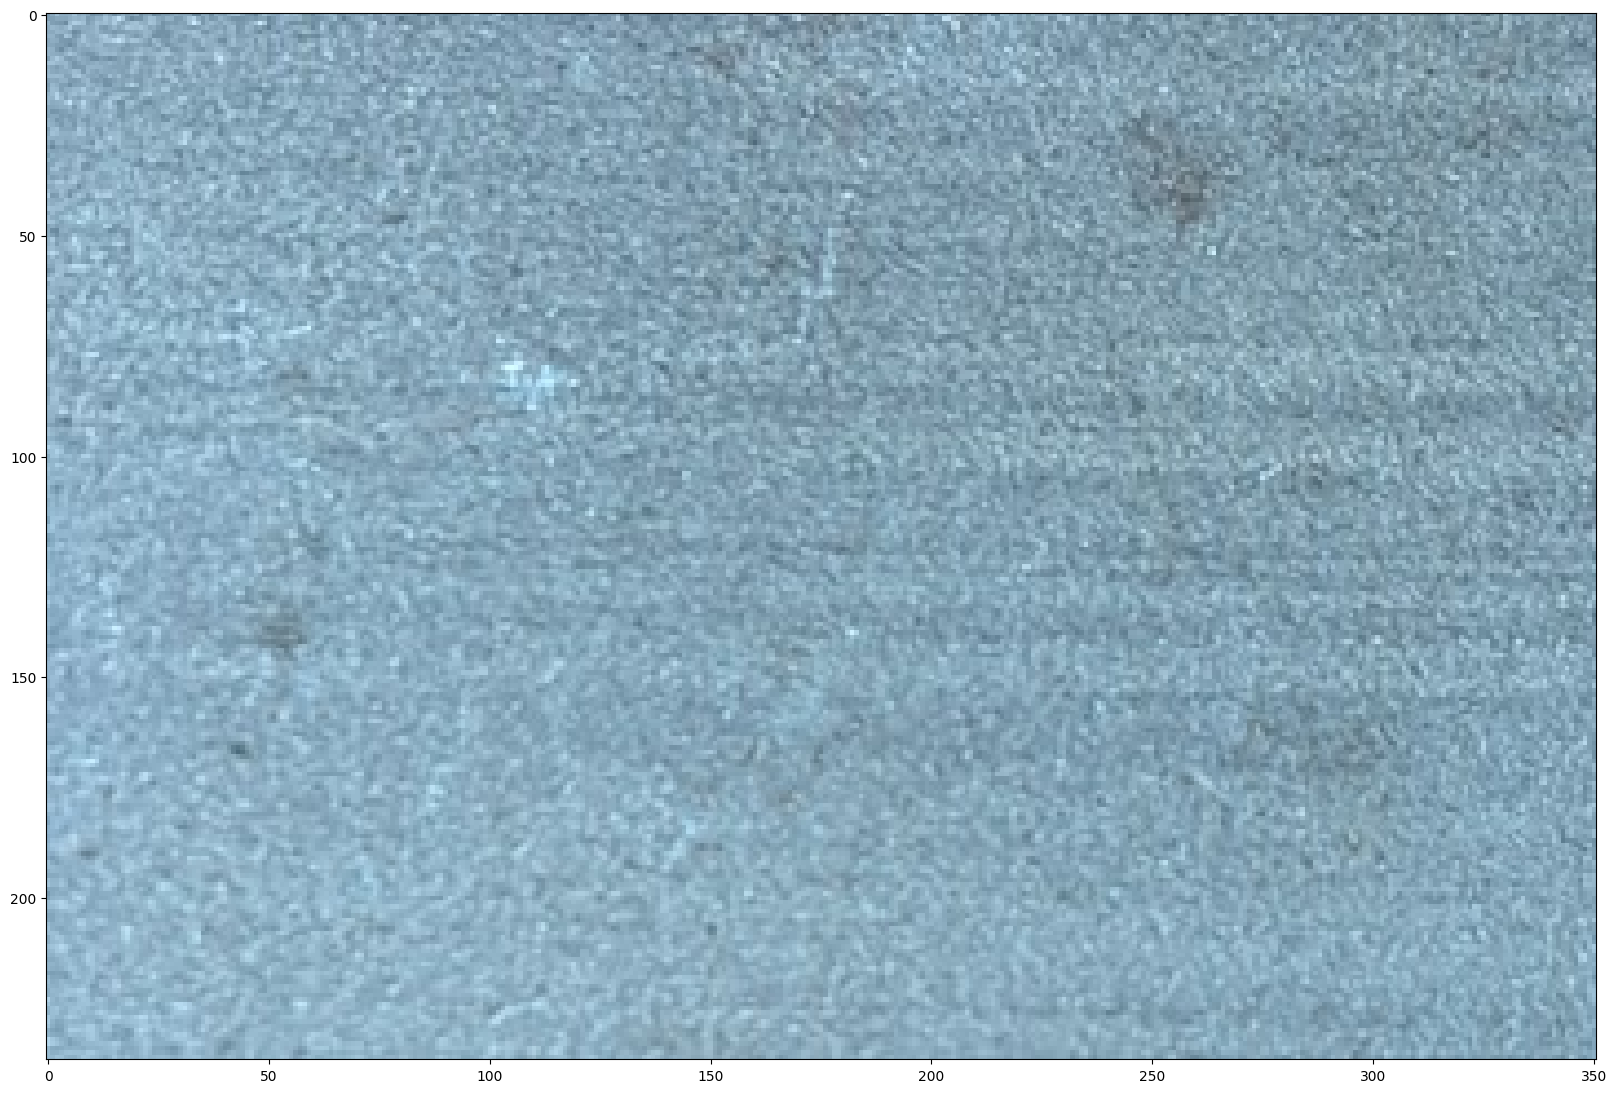

In [4]:
test_img = cv.imread("D:\IMAGE PROCESSING\pic_2.jpg")
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
show_image(test_img)

In [5]:
width, height, dimension = test_img.shape
print(f'Width RGB = {width}')
print(f'Height RGB = {height}')
print(f'Dimension RGB = {dimension}')

Width RGB = 237
Height RGB = 351
Dimension RGB = 3


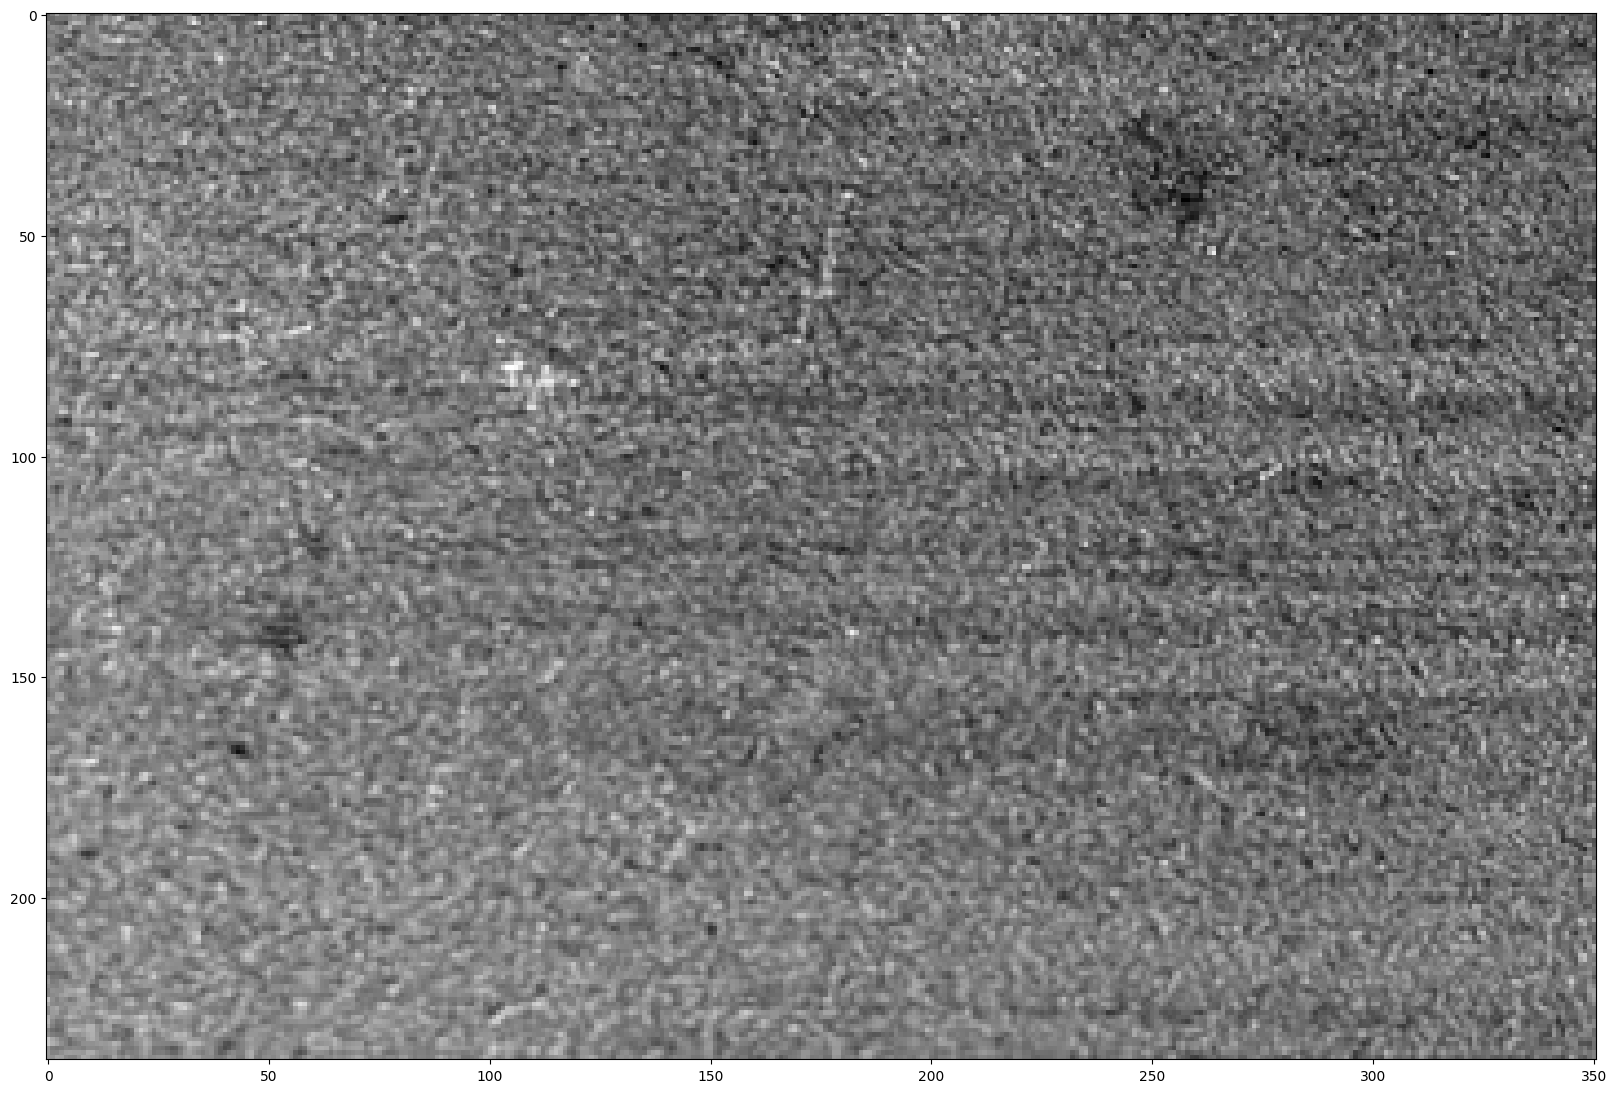

In [6]:
test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
show_image(test_img_gray)

In [7]:
width, height = test_img_gray.shape
print(f'Width Grayscale = {width}')
print(f'Height Grayscale = {height}')
print(f'Image Shape Grayscale {test_img_gray.shape}')

Width Grayscale = 237
Height Grayscale = 351
Image Shape Grayscale (237, 351)


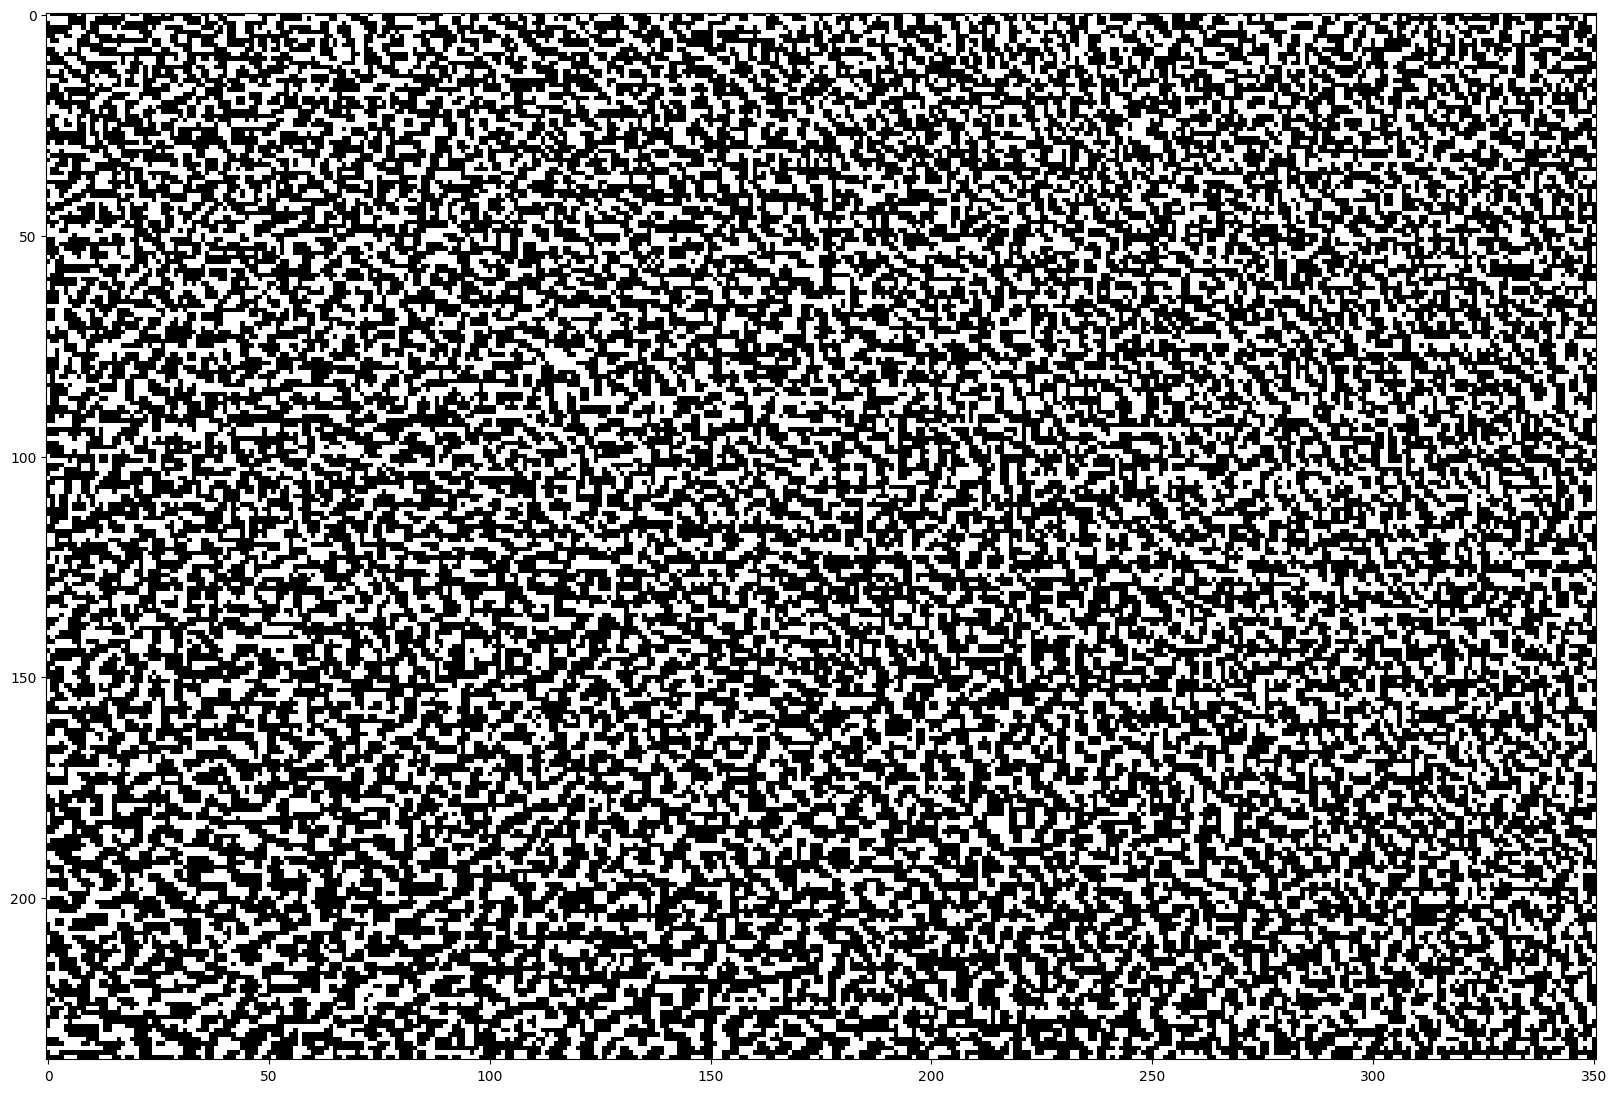

In [8]:
test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
show_image(test_img_thresh)

In [10]:
def glcm_feature(matrix_coocurrence, featureName):
    feature = graycoprops(matrix_coocurrence, featureName)
    result = np.average(feature)
    return result
distance = 10
teta = 90

contrast_test = []
homogeneity_test = []
energy_test = []
correlation_test = []


glcm = graycomatrix(test_img_thresh, [distance], [teta], levels=256, symmetric=True, normed=True)
contrast_test.append(glcm_feature(glcm, 'contrast'))
homogeneity_test.append(glcm_feature(glcm, 'homogeneity'))
energy_test.append(glcm_feature(glcm, 'energy'))
correlation_test.append(glcm_feature(glcm, 'correlation'))

print(f'Homogenity : {homogeneity_test[0]}')
print(f'Correlation : {correlation_test[0]}')
print(f'Energy : {energy_test[0]}')
print(f'Contrast : {contrast_test[0]}')

Homogenity : 0.509474655225357
Correlation : 0.0013135168697486457
Energy : 0.508833535763967
Contrast : 31896.901069315943


In [11]:
def preprocessingImage(image):
    test_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    test_img_gray = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
    test_img_thresh = cv.adaptiveThreshold(test_img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
    cnts = cv.findContours(test_img_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        test_img_ROI = test_img[y:y+h, x:x+w]
        break
    test_img_ROI_resize = cv.resize(test_img_ROI, (width, height))
    test_img_ROI_resize_gray = cv.cvtColor(test_img_ROI_resize, cv.COLOR_RGB2GRAY)
    
    return test_img_ROI_resize_gray

In [ ]:
file_normal = 301
file_cataract = 101
file_glaucoma = 102
file_retina = 101
width, height = 400, 400
distance = 10
teta = 90
data_eye = np.zeros((5, 601))
count = 0
indextable = ['contrast', 'homogenity', 'energy', 'correlation', 'Label']

normal_dataset_path = '../input/cataractdataset/dataset/1_normal/'
cataract_dataset_path = '../input/cataractdataset/dataset/2_cataract/'
glaucoma_dataset_path = '../input/cataractdataset/dataset/2_glaucoma/'
retina_dataset_path = '../input/cataractdataset/dataset/3_retina_disease/'